### Importing necessary packages and Loading the dataset

In [2]:
import numpy as np
import pandas as pd

In [3]:
import plotly.graph_objs as go
import seaborn as sns
import squarify
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
import os
import warnings
warnings.filterwarnings('ignore')

In [5]:
files = []
for dirname, _, filenames in os.walk('../input/india-trade-data'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

../input/india-trade-data\2018-2010_export.csv
../input/india-trade-data\2018-2010_import.csv


In [6]:
data_export = pd.read_csv(files[0])
data_import = pd.read_csv(files[1])

### Understanding the Data

In [7]:
data_export.head()

,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,0.18,AFGHANISTAN TIS,2018
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.00,AFGHANISTAN TIS,2018
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,12.48,AFGHANISTAN TIS,2018
3,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,0.00,AFGHANISTAN TIS,2018
4,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,1.89,AFGHANISTAN TIS,2018


In [8]:
data_import.head()

,HSCode,Commodity,value,country,year
0,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.00,AFGHANISTAN TIS,2018
1,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,12.38,AFGHANISTAN TIS,2018
2,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,268.60,AFGHANISTAN TIS,2018
3,9,"COFFEE, TEA, MATE AND SPICES.",35.48,AFGHANISTAN TIS,2018
4,11,PRODUCTS OF THE MILLING INDUSTRY; MALT; STARCH...,NaN,AFGHANISTAN TIS,2018


In [9]:
data_import.HSCode.unique()

array([ 5,  7,  8,  9, 11, 12, 13, 20, 25, 27, 39, 41, 49, 51, 52, 57, 68,
       71, 72, 74, 81, 82, 84, 85, 90, 96, 97, 98, 99, 18, 26, 33, 40, 48,
       64, 70, 73, 76, 83, 87, 94, 28, 29, 30, 31, 38, 45, 47, 78, 86, 59,
       63, 34, 44, 69, 79, 54, 22, 32,  1,  3,  4,  6, 10, 15, 23, 24, 35,
       42, 55, 93, 95, 17,  2, 19, 21, 37, 46, 50, 53, 56, 58, 60, 61, 62,
       65, 66, 67, 75, 88, 89, 91, 92, 16, 43, 80, 14, 36], dtype=int64)

In [10]:
data_import.HSCode.nunique()

98

In [11]:
data_export.country.unique()

array(['AFGHANISTAN TIS', 'ALBANIA', 'ALGERIA', 'AMERI SAMOA', 'ANDORRA',
       'ANGOLA', 'ANGUILLA', 'ANTARTICA', 'ANTIGUA', 'ARGENTINA',
       'ARMENIA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIJAN',
       'BAHAMAS', 'BAHARAIN IS', 'BANGLADESH PR', 'BARBADOS', 'BELARUS',
       'BELGIUM', 'BELIZE', 'BENIN', 'BERMUDA', 'BHUTAN', 'BOLIVIA',
       'BOSNIA-HRZGOVIN', 'BOTSWANA', 'BR VIRGN IS', 'BRAZIL', 'BRUNEI',
       'BULGARIA', 'BURKINA FASO', 'BURUNDI', 'C AFRI REP', 'CAMBODIA',
       'CAMEROON', 'CANADA', 'CAPE VERDE IS', 'CAYMAN IS', 'CHAD',
       'CHILE', 'CHINA P RP', 'COLOMBIA', 'COMOROS', 'CONGO D. REP.',
       'CONGO P REP', 'COOK IS', 'COSTA RICA', "COTE D' IVOIRE",
       'CROATIA', 'CUBA', 'CURACAO', 'CYPRUS', 'CZECH REPUBLIC',
       'DENMARK', 'DJIBOUTI', 'DOMINIC REP', 'DOMINICA', 'ECUADOR',
       'EGYPT A RP', 'EL SALVADOR', 'EQUTL GUINEA', 'ERITREA', 'ESTONIA',
       'ETHIOPIA', 'FALKLAND IS', 'FAROE IS.', 'FIJI IS', 'FINLAND',
       'FR GUIANA', 'FR POLYNE

#### Columns

- HSCode
    - HS stands for Harmonized System. It was developed by the WCO (World Customs Organization) as a multipurpose international product nomenclature that describes the type of good that is shipped HS Code Structure.
    - 98 Unique Codes for Commodity identification.
- Commodity
    - Economic good/service that has full/substantial fungibility.
- Value
    - Import/export values in million US dollars
- Country
    - Country imported from/ exported to
- Year
    - Year in which comodities were imported/exported
    - Between 2010-2018

In [12]:
data_import.columns

Index(['HSCode', 'Commodity', 'value', 'country', 'year'], dtype='object')

#### Description of data

`data_import` has high outlier values as 75% data lies under `4.91`,
similary, `data_export` has high outlier values as 75% data lies under `3.77`.

In [13]:
data_import.describe()

,HSCode,value,year
count,93095.000000,79068.000000,93095.000000
mean,53.849573,63.289855,2014.654740
std,27.567486,666.652363,2.702373
min,1.000000,0.000000,2010.000000
25%,30.000000,0.030000,2012.000000
50%,54.000000,0.380000,2015.000000
75%,78.000000,4.910000,2017.000000
max,99.000000,32781.570000,2018.000000


In [14]:
data_export.describe()

,HSCode,value,year
count,137023.000000,122985.000000,137023.000000
mean,51.330302,21.567829,2014.056304
std,28.018026,229.701279,2.580160
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2012.000000
50%,52.000000,0.360000,2014.000000
75%,74.000000,3.770000,2016.000000
max,99.000000,19805.170000,2018.000000


### Null Values
Null values in `data_import.value` and `data_export.value` 

In [15]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93095 entries, 0 to 93094
Data columns (total 5 columns):
HSCode       93095 non-null int64
Commodity    93095 non-null object
value        79068 non-null float64
country      93095 non-null object
year         93095 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.6+ MB


In [16]:
data_export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137023 entries, 0 to 137022
Data columns (total 5 columns):
HSCode       137023 non-null int64
Commodity    137023 non-null object
value        122985 non-null float64
country      137023 non-null object
year         137023 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.2+ MB


In [17]:
data_import.isnull().sum()

HSCode           0
Commodity        0
value        14027
country          0
year             0
dtype: int64

In [18]:
data_export.isnull().sum()

HSCode           0
Commodity        0
value        14038
country          0
year             0
dtype: int64

In [19]:
## no of Unknown Countries: import
data_import[data_import.country=='UNSPECIFIED'].shape[0]

979

In [20]:
## no of Unknown Countries: export
data_import[data_export.country=='UNSPECIFIED'].shape[0]

452

In [21]:
## Duplicated Columns
print('exports: ', data_export.duplicated().sum())
print('imports: ', data_import.duplicated().sum())

exports:  0
imports:  18002


#### Data Cleaning

In [22]:
def clean_data(data):
    print('cleaning data..')
    data['country'] = data['country'].apply(lambda x: np.NaN if x=='UNSPECIFIED' else x)
    data = data[data.value!=0]
    data.dropna(inplace=True)
    data.year = pd.Categorical(data.year)
    data.drop_duplicates(inplace=True)
    return data

In [23]:
data_import = clean_data(data_import)
data_export = clean_data(data_export)

cleaning data..
cleaning data..


### Analysis

#### Commodity Analysis

In [24]:
print("Import Commodity Count: ", data_import['Commodity'].nunique())

Import Commodity Count:  98


In [25]:
print("Export Commodity Count: ", data_export['Commodity'].nunique())

Export Commodity Count:  98


In [28]:
# Most Popular commodity in use
# as Every Commodity has an Unique HSCode,
# for the convention of visualization we'll use the HSCode Count
comm_count = pd.DataFrame(data_import.HSCode.value_counts().sort_values(ascending=False))
comm_count.columns = ['HSCode_count']

In [33]:
comm_count_desc = pd.DataFrame(data_import.Commodity.value_counts())
comm_count_desc.head(20)

,Commodity
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",1378
IRON AND STEEL,1333
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1314
ALUMINIUM AND ARTICLES THEREOF.,1217
PLASTIC AND ARTICLES THEREOF.,1112
COPPER AND ARTICLES THEREOF.,1058
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1009
RAW HIDES AND SKINS (OTHER THAN FURSKINS) AND LEATHER,983
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,983
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",900


Text(0,0.5,'Count')

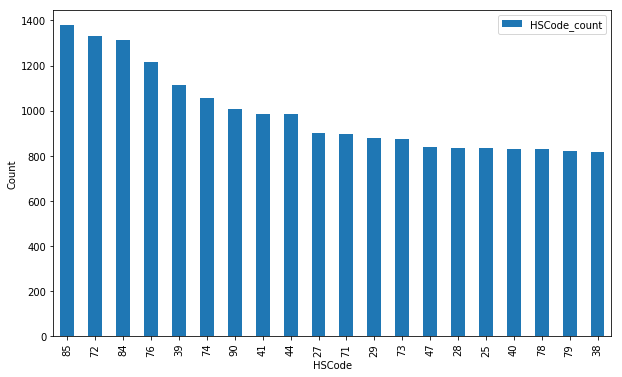

In [27]:
comm_count.head(20).plot(kind='bar', figsize=(10, 6))
plt.xlabel('HSCode')
plt.ylabel('Count')

In [35]:
print("No. of countries to which India imports Goods:", str(data_import['country'].nunique()))
print("No. of countries from which India exports Goods:", str(data_export['country'].nunique()))

No. of countries to which India imports Goods: 240
No. of countries from which India exports Goods: 246


#### Year Wise Import-Export
- India imports drastically more than it exports 

In [36]:
data_import_pa = data_import.groupby('year').agg({'value':'sum'})
data_export_pa = data_export.groupby('year').agg({'value':'sum'})

In [39]:
data_import_pa['deficit'] = data_export_pa.value - data_import_pa.value
data_import_pa

,value,deficit
year,,
2010,365444.94,-130033.93
2011,488272.63,-198761.05
2012,488805.22,-193858.35
2013,446095.99,-143251.86
2014,440463.87,-134304.07
2015,372291.40,-112499.98
2016,377006.72,-103641.56
2017,456379.59,-155301.41
2018,513981.62,-186830.19


In [46]:
# trace1: import
trace1 = go.Bar(
    x = data_import_pa.index,
    y = data_import_pa.value,
    name = "Import",
    marker = dict(  color = 'rgba(0,190, 255, 1)',
                    line = dict(color='rgb(0,0,0)',
                                width = 1.5)
                 ),
    
    text = data_import_pa.value
    
)

# trace2: export
trace2 = go.Bar(
    x = data_export_pa.index,
    y = data_export_pa.value,
    name = "Export",
    marker = dict(  color = 'rgba(1,255, 130, 1)',
                    line = dict(color='rgb(0,0,0)',
                                width = 1.5)
                 ),
    
    text = data_export_pa.value
    
)

#trace3: Trade deficit
trace3 = go.Bar(
    x = data_import_pa.index,
    y = data_import_pa.deficit,
    name = "Trade Deficit",
    marker = dict(  color = 'rgba(220,20, 60, 1)',
                    line = dict(color='rgb(0,0,0)',
                                width = 1.5)
                 ),
    
    text = data_import_pa.deficit
    
)

data = [trace1, trace2, trace3]
layout = go.Layout(barmode='group')
fig = go.Figure(data = data, layout = layout)
fig.update_layout(
    
    title=go.layout.Title(
        text='Yearwise Import/Export/Trade deficit',
        xref='paper',
        x=0
    ),
    
    xaxis = go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='Year',
            font = dict(
                    family="Courier New, monospace",
                    size=18,
                    color='#7f7f7f'
            )
        )
    ),
    
    yaxis = go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='Value',
            font = dict(
                family="Courier New, monospace",
                size=18,
                color='#7f7f7f'
            )
        )
    )
    
)


fig.show()

#### Country Wise Import-Export

In [49]:
data_import.country

1        AFGHANISTAN TIS
2        AFGHANISTAN TIS
3        AFGHANISTAN TIS
5        AFGHANISTAN TIS
6        AFGHANISTAN TIS
              ...       
93084           ZIMBABWE
93085           ZIMBABWE
93087           ZIMBABWE
93089           ZIMBABWE
93090           ZIMBABWE
Name: country, Length: 54554, dtype: object

In [54]:
data_import_country = data_import.groupby('country')\
                        .agg({'value':'sum'})\
                        .sort_values(by='value', ascending=False)
data_import_country = data_import_country[:10]

data_export_country = data_export.groupby('country')\
                        .agg({'value':'sum'})\
                        .sort_values(by='value', ascending=False)
data_export_country = data_export_country[:10]

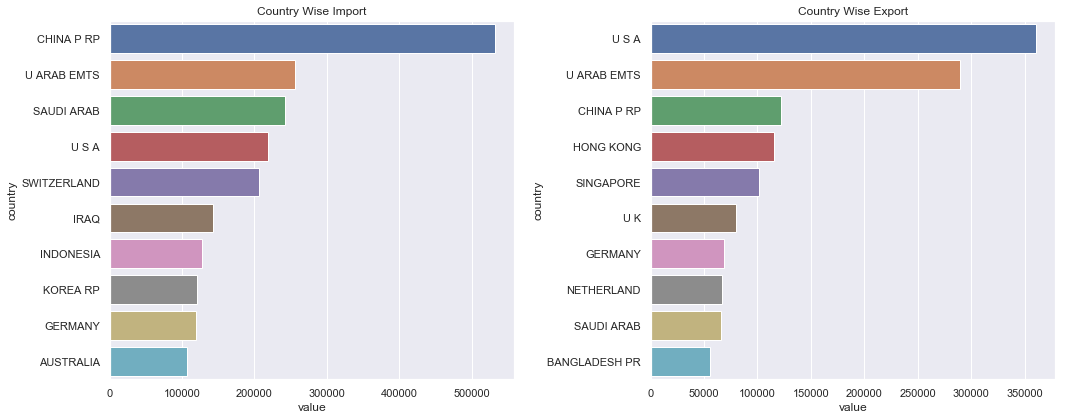

In [56]:
sns.set(rc={'figure.figsize':(15, 6)})
ax1 = plt.subplot(121)

sns.barplot(data_import_country.value,
            data_import_country.index).set_title('Country Wise Import')

ax2 = plt.subplot(122)
sns.barplot(data_export_country.value,
            data_export_country.index).set_title('Country Wise Export')

plt.tight_layout()
plt.show()

#### Import-Export Year-Wise Trend 

In [59]:
fig = go.Figure()

# Create and style traces
fig.add_trace(go.Scatter(x=data_import_pa.index, y=data_import_pa.value,
                        name='Import', mode='lines+markers',
                        line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=data_export_pa.index, y=data_export_pa.value,
                        name='Export', mode='lines+markers',
                        line=dict(color='royalblue', width=4)))

fig.update_layout(
    title=go.layout.Title(
        text='Yearwise Import/Export',
        xref='paper',
        x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text="Year",
            font=dict(size=18)
        )
    ),
    
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text="Value",
            font=dict(size=18)
        )
    )
)

fig.show()

- Trade Slowdown in 2014-15
- Import-Export both show a sharp rise in 2011
- Import trend sharply declines in 2012-15 while export had a sharp decline in 2014-15
- Both Import-Export rise exponentially in the 2016-18 period and reaches the maximum in 8 years in 2018

#### Commodity Wise Import-Export

In [84]:
data_import_com = data_import\
            .groupby('Commodity')\
            .agg({'value':'sum'})\
            .sort_values(by='value', ascending=False)

data_export_com = data_export\
            .groupby('Commodity')\
            .agg({'value':'sum'})\
            .sort_values(by='value', ascending=False)

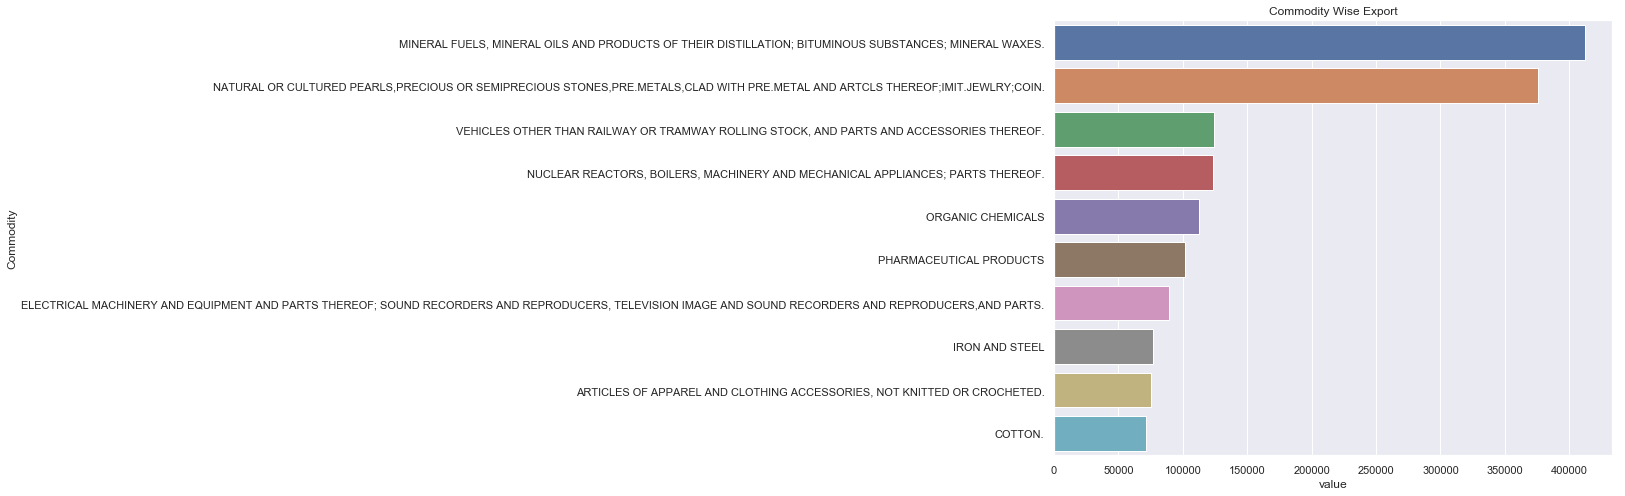

In [85]:
# Export Plot
plt.figure(figsize=(10, 8))
sns.barplot(data_export_com[:10].value, data_export_com[:10].index)\
                .set_title('Commodity Wise Export')
plt.show()

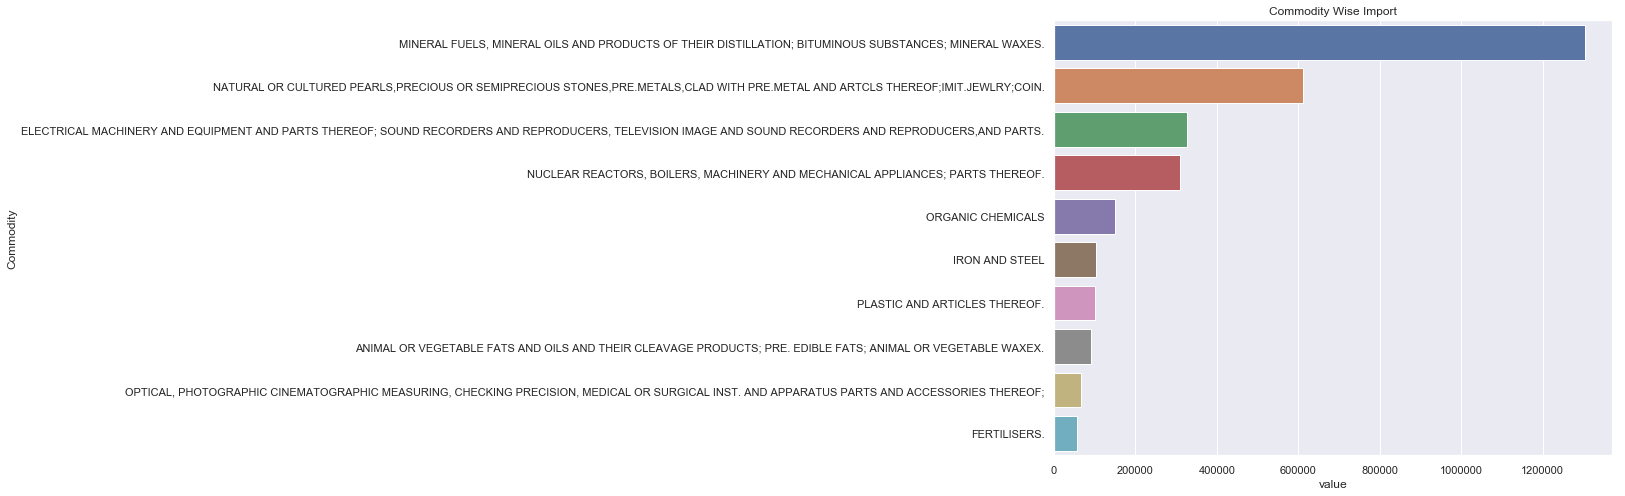

In [86]:
# Import Plot
plt.figure(figsize=(10, 8))
sns.barplot(data_import_com[:10].value, data_import_com[:10].index)\
                .set_title('Commodity Wise Import')

plt.show()

- Top Exported Categories are also the top Imported Categories but there is a **huge** trade deficit

In [123]:
com_surplus.iloc[:10, :1]

,value
Commodity,
"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THEIR DISTILLATION; BITUMINOUS SUBSTANCES; MINERAL WAXES.",1305259.28
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",326602.08
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",611404.45
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",310410.14
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,90880.98
FERTILISERS.,57157.93
PLASTIC AND ARTICLES THEREOF.,99483.22
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",65458.47
PROJECT GOODS; SOME SPECIAL USES.,38998.81


,value
Commodity,
PROJECT GOODS; SOME SPECIAL USES.,38998.81
FERTILISERS.,57157.93
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",65458.47
ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CLEAVAGE PRODUCTS; PRE. EDIBLE FATS; ANIMAL OR VEGETABLE WAXEX.,90880.98
PLASTIC AND ARTICLES THEREOF.,99483.22
ORGANIC CHEMICALS,150059.05
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",310410.14
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",326602.08
"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRECIOUS STONES,PRE.METALS,CLAD WITH PRE.METAL AND ARTCLS THEREOF;IMIT.JEWLRY;COIN.",611404.45


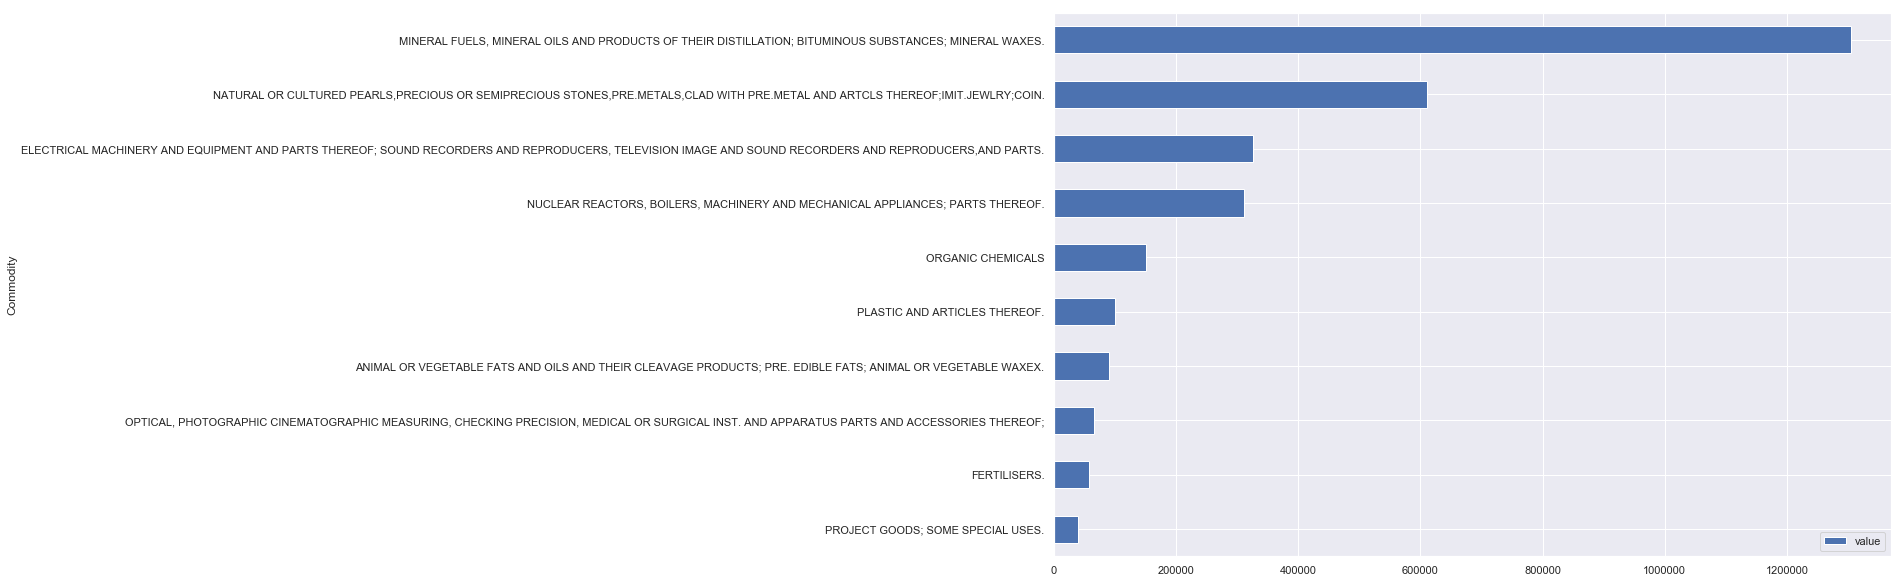

In [132]:
data_import_com['deficit'] = data_import_com.value - data_export_com.value

# commodities produced by India in Surplus
plt.figure(figsize=(12, 10))
com_surplus = data_import_com[data_import_com.deficit>0].sort_values(by='deficit', ascending=False)
com_surplus.iloc[:10, :1].sort_values(by='value').plot(kind='barh')

plt.show()

- MINERAL FUELS, OILS... has an **exponential high** import surplus

### Expensive Import Analysis

In [134]:
expensive_import = data_import[data_import.value>1000]
expensive_import.head(10)

,HSCode,Commodity,value,country,year
55,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1559.37,ALGERIA,2018
95,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",4012.00,ANGOLA,2018
142,15,ANIMAL OR VEGETABLE FATS AND OILS AND THEIR CL...,1720.46,ARGENTINA,2018
236,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",9664.58,AUSTRALIA,2018
701,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",6619.68,BELGIUM,2018
942,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1596.79,BRAZIL,2018
1215,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1165.81,CANADA,2018
1414,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1047.32,CHINA P RP,2018
1415,28,INORGANIC CHEMICALS; ORGANIC OR INORGANIC COMP...,1050.23,CHINA P RP,2018
1416,29,ORGANIC CHEMICALS,8596.25,CHINA P RP,2018


#### Import Value per HSCode

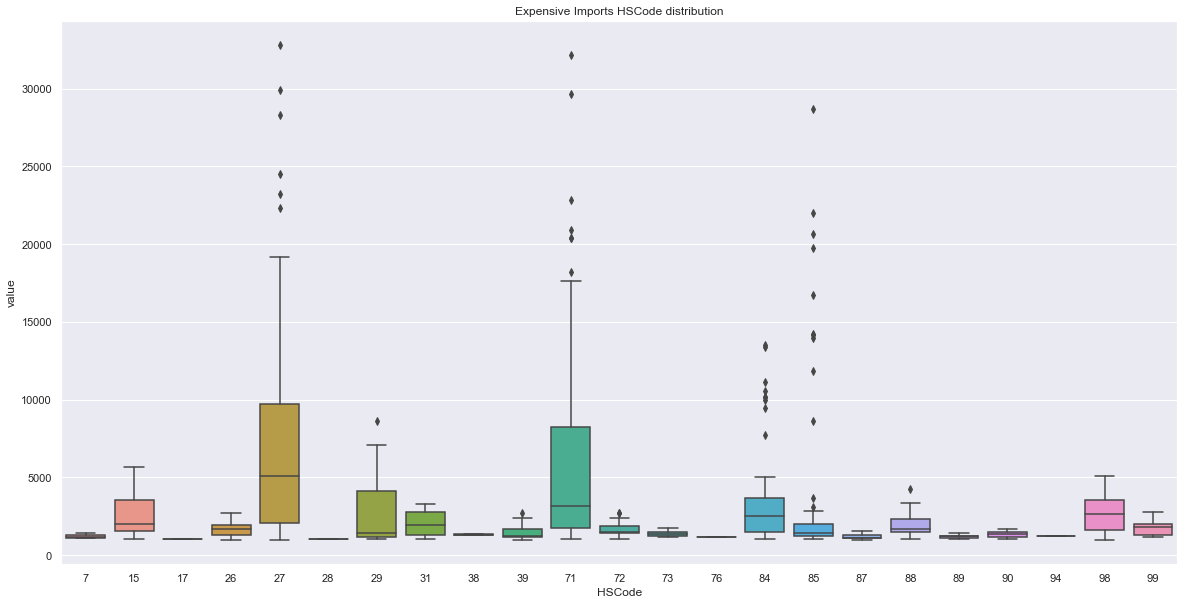

In [139]:
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x='HSCode', y='value', data=expensive_import)\
                .set_title('Expensive Imports HSCode distribution')
plt.show()

- HSCode Chapter 27(MINERAL FUELS...) and Chapter 71(EXPENSIVE JEWELLERY...) tops the list
- HSCode Chapters 29, 84 & 85 also have highly expensive imports 

In [141]:
expensive_import_by_HSCode = expensive_import.groupby(['HSCode'])\
                                .agg({'value':'sum'})\
                                .sort_values(by='value')

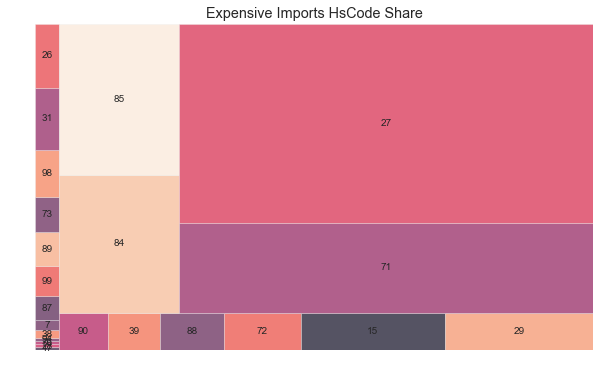

In [142]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)
squarify.plot(sizes=np.array(expensive_import_by_HSCode),
              label=expensive_import_by_HSCode.index,
              alpha=.7)
plt.axis('off')
plt.title('Expensive Imports HsCode Share')

plt.show()

- The share of the HSCode category 27, 71, 85, 84 are in the most expensive Category as the most valuable imports

#### Country Analysis

In [143]:
expensive_import['country'].nunique()

49

In [144]:
expensive_import_by_country = expensive_import.groupby(['country'])\
                                .agg({'value': 'sum'})\
                                .sort_values(by='value')

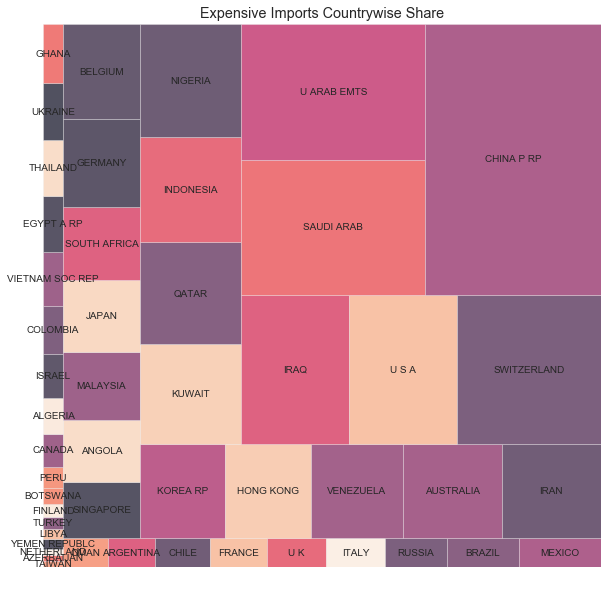

In [146]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 10)
squarify.plot(
                sizes = np.array(expensive_import_by_country),
                label = expensive_import_by_country.index,
                alpha=.7)
plt.title('Expensive Imports Countrywise Share')
plt.axis('off')
plt.show()

- Country Wise the most Expensive Imports are tow China, Saudi Arab, UAR, Switzerland. 